# **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading Pime & Diabet Dataset**

In [2]:
#import csv to read dataset
df= pd.read_csv("db.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Data Preprocessing**



In [67]:
#first three rows in the DataFrame
print(df.head(3))
#last five rows in the DataFrame
df.tail(5)

   Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   
1            1       85             66        0  26.6   
2            8      183             64        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1
767,1,93,70,0,30.4,0.315,23,0


In [4]:
#type of each attribute
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#dimensionality of the DataFrame
df.shape

(768, 9)

In [6]:
#description of the data in the DataFrame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**missing values**

The results show that the iris data set has no missing value.

In [7]:
#number of missing values in the DataFrame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 **Duplicate Data**

 The results show that the iris data set has one duplicate data.

> in this dataset we remove the duplicate data. 



In [8]:
#number of duplicate data in the DataFrame
df.duplicated().sum()  #1
#df.index[df.duplicated()] #142
#removing duplicate data from the Dataframe
#df.drop_duplicates()

0

Because most SkinThickness values are = 0 and it has no effect on diabet we drop the column dataset.

In [9]:
group = df.groupby(['SkinThickness']).size()
print(group)
df.drop('SkinThickness', inplace=True, axis=1)
#df

SkinThickness
0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
dtype: int64


**Visualizing the Pre-Processed Data**

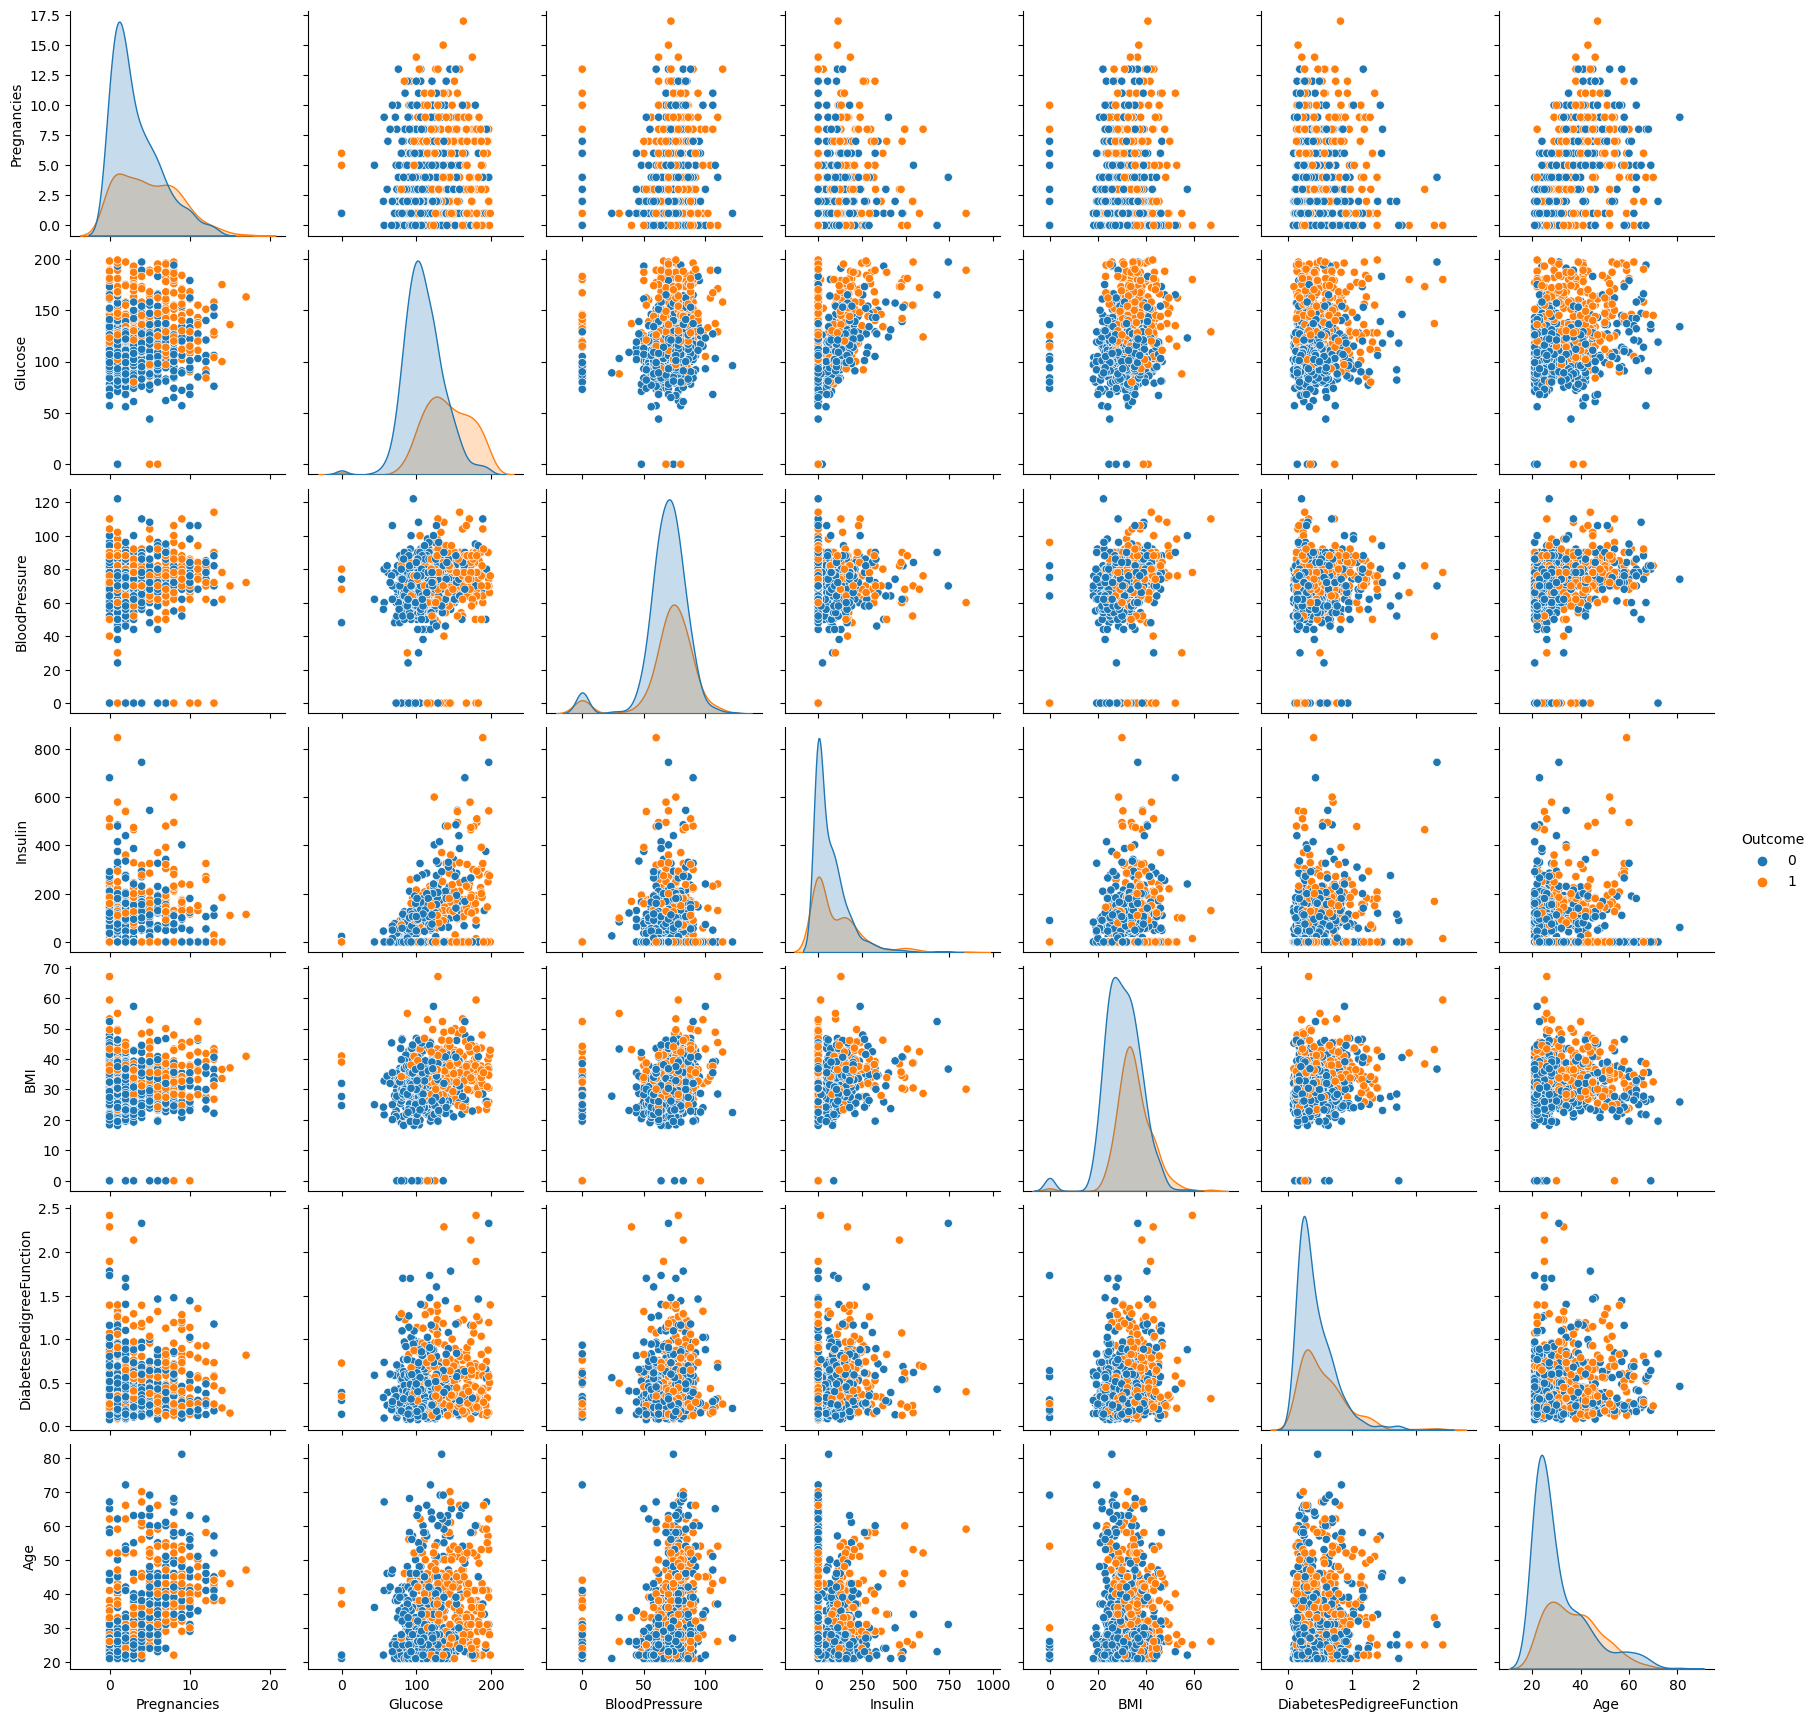

In [45]:
   import seaborn as sns
sns.pairplot(df, hue="Outcome")
plt.show()

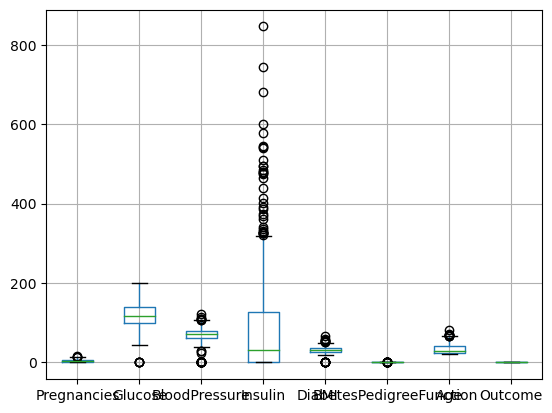

In [11]:
#boxplot
df.boxplot()
plt.show()

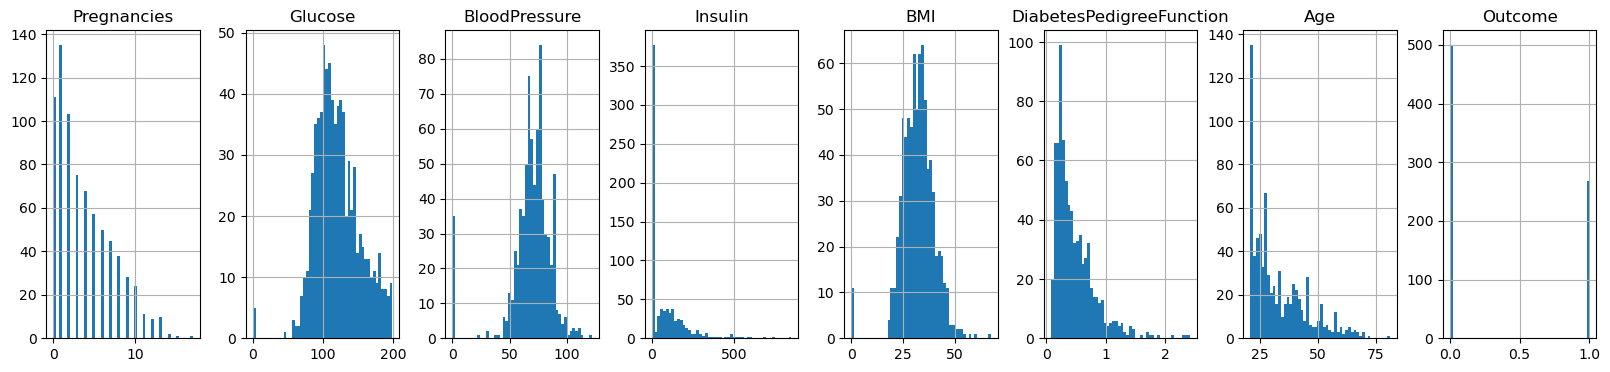

In [12]:
#Histogram
df.hist(bins=50, layout=(1,8), figsize=(20, 4))
plt.show()

# **Classification**

**Spliting the Dataset**

In [29]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :7]
y = df.iloc[:, 7] #labels
# Split data into the training sets and the testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
print(x_train.shape) #(127, 4)
print(x_test.shape) #(23, 4)
print(x)

(652, 7)
(116, 7)
     Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763           

**Model1 : DecisionTree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [31]:
from sklearn.metrics import *
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        76
           1       0.62      0.70      0.66        40

    accuracy                           0.75       116
   macro avg       0.73      0.74      0.73       116
weighted avg       0.76      0.75      0.75       116

75.0


**Model2 : Svm**

In [32]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)
y_pred=model2.predict(x_test)

In [33]:
#summery of model
print(classification_report(y_test, y_pred))
#accuracy
accuracy=accuracy_score(y_pred,y_test)*100
print(accuracy)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        76
           1       0.70      0.57      0.63        40

    accuracy                           0.77       116
   macro avg       0.75      0.72      0.73       116
weighted avg       0.76      0.77      0.76       116

76.72413793103449
